In [24]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('student_clustering.csv')
df

,cgpa,iq
0,NaN,NaN
1,4.60,86.0
2,4.67,86.0
3,4.68,87.0
4,4.68,89.0
...,...,...
196,9.07,117.0
197,9.13,118.0
198,9.18,119.0
199,9.23,114.0


In [19]:
df.drop(0,inplace=True)

In [20]:
df.shape

(200, 2)

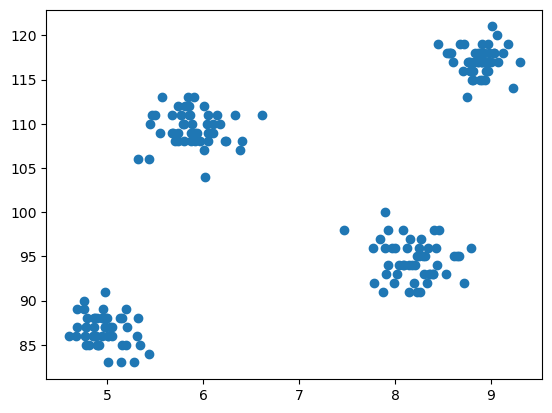

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq']);

In [22]:
from sklearn.cluster import KMeans

In [25]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [26]:
wcss

[29957.898288000004,
 4184.14127,
 2364.005583420084,
 681.9696600000001,
 556.6603823704868,
 462.4671498408424,
 402.54343889133554,
 267.9399394233791,
 224.4191856909547,
 216.43603462220943]

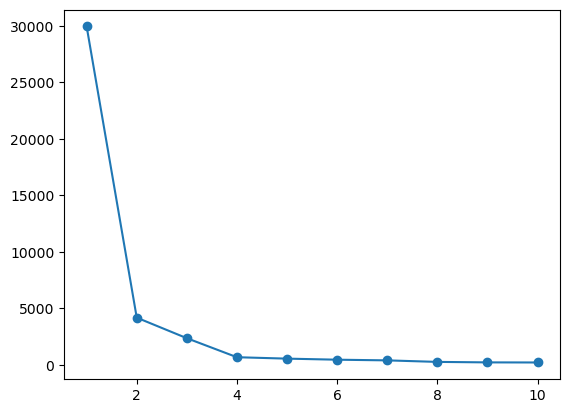

In [34]:
plt.plot(range(1,11),wcss,marker = 'o');

In [31]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [32]:
y_means

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [35]:
df['clusters'] = y_means

In [33]:
X[y_means == 3,1]

array([106., 106., 110., 111., 111., 109., 113., 109., 111., 109., 108.,
       109., 108., 112., 111., 110., 108., 110., 112., 113., 111., 112.,
       111., 109., 108., 109., 110., 113., 108., 109., 109., 108., 112.,
       107., 104., 110., 111., 108., 109., 109., 110., 109., 111., 110.,
       108., 108., 111., 107., 108., 111.])

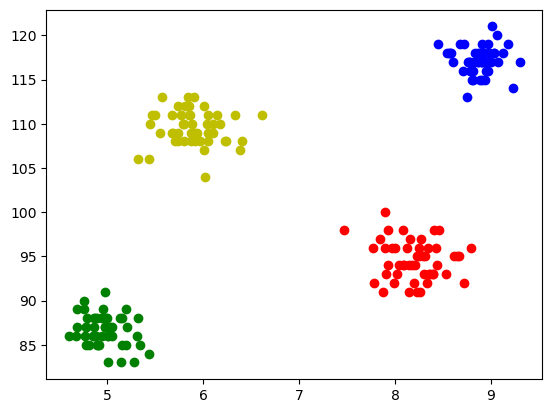

In [42]:
plt.scatter(df[df['clusters']==0]['cgpa'],df[df['clusters']==0]['iq'],color='b')
plt.scatter(df[df['clusters']==1]['cgpa'],df[df['clusters']==1]['iq'],color='r')
plt.scatter(df[df['clusters']==2]['cgpa'],df[df['clusters']==2]['iq'],color='g')
plt.scatter(df[df['clusters']==3]['cgpa'],df[df['clusters']==3]['iq'],color='y');

# silhouette_Score

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
silhouette_score(X,y_means)    #range is - to 

0.7349682510969364